<center><h1>Assignment 3</h1></center>

In [204]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [205]:
data =pd.read_csv("Data-Melbourne_F_fixed.csv")
data
df=pd.DataFrame(data)
print(df)
data

      Serial No   Average Outflow  Average Inflow  Energy Consumption  \
0              0            2.941           2.589            175856.0   
1              1            2.936           2.961            181624.0   
2              2            2.928           3.225            202016.0   
3              3            2.928           3.354            207547.0   
4              4            2.917           3.794            202824.0   
...          ...              ...             ...                 ...   
1377        1377            5.068           4.716            305938.0   
1378        1378            5.882           5.510            293446.0   
1379        1379            4.638           4.811            307968.0   
1380        1380            5.373           4.929            316675.0   
1381        1381            4.072           5.194            318268.0   

      Ammonia  Biological Oxygen Demand  Chemical Oxygen Demand  \
0        27.0                     365.0                 

,Serial No,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0
1378,1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0
1379,1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0
1380,1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0


In [187]:
df.info()
print('\n')
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Serial No                 1382 non-null   int64  
 1   Average Outflow           1382 non-null   float64
 2   Average Inflow            1382 non-null   float64
 3   Energy Consumption        1382 non-null   float64
 4   Ammonia                   1382 non-null   float64
 5   Biological Oxygen Demand  1382 non-null   float64
 6   Chemical Oxygen Demand    1382 non-null   float64
 7   Total Nitrogen            1382 non-null   float64
 8   Average Temperature       1382 non-null   float64
 9   Maximum temperature       1382 non-null   float64
 10  Minimum temperature       1382 non-null   float64
 11  Atmospheric pressure      1382 non-null   float64
 12  Average humidity          1382 non-null   float64
 13  Total rainfall            1382 non-null   float64
 14  Average 

#### This shows that there are no null values in the data set

<Axes: >

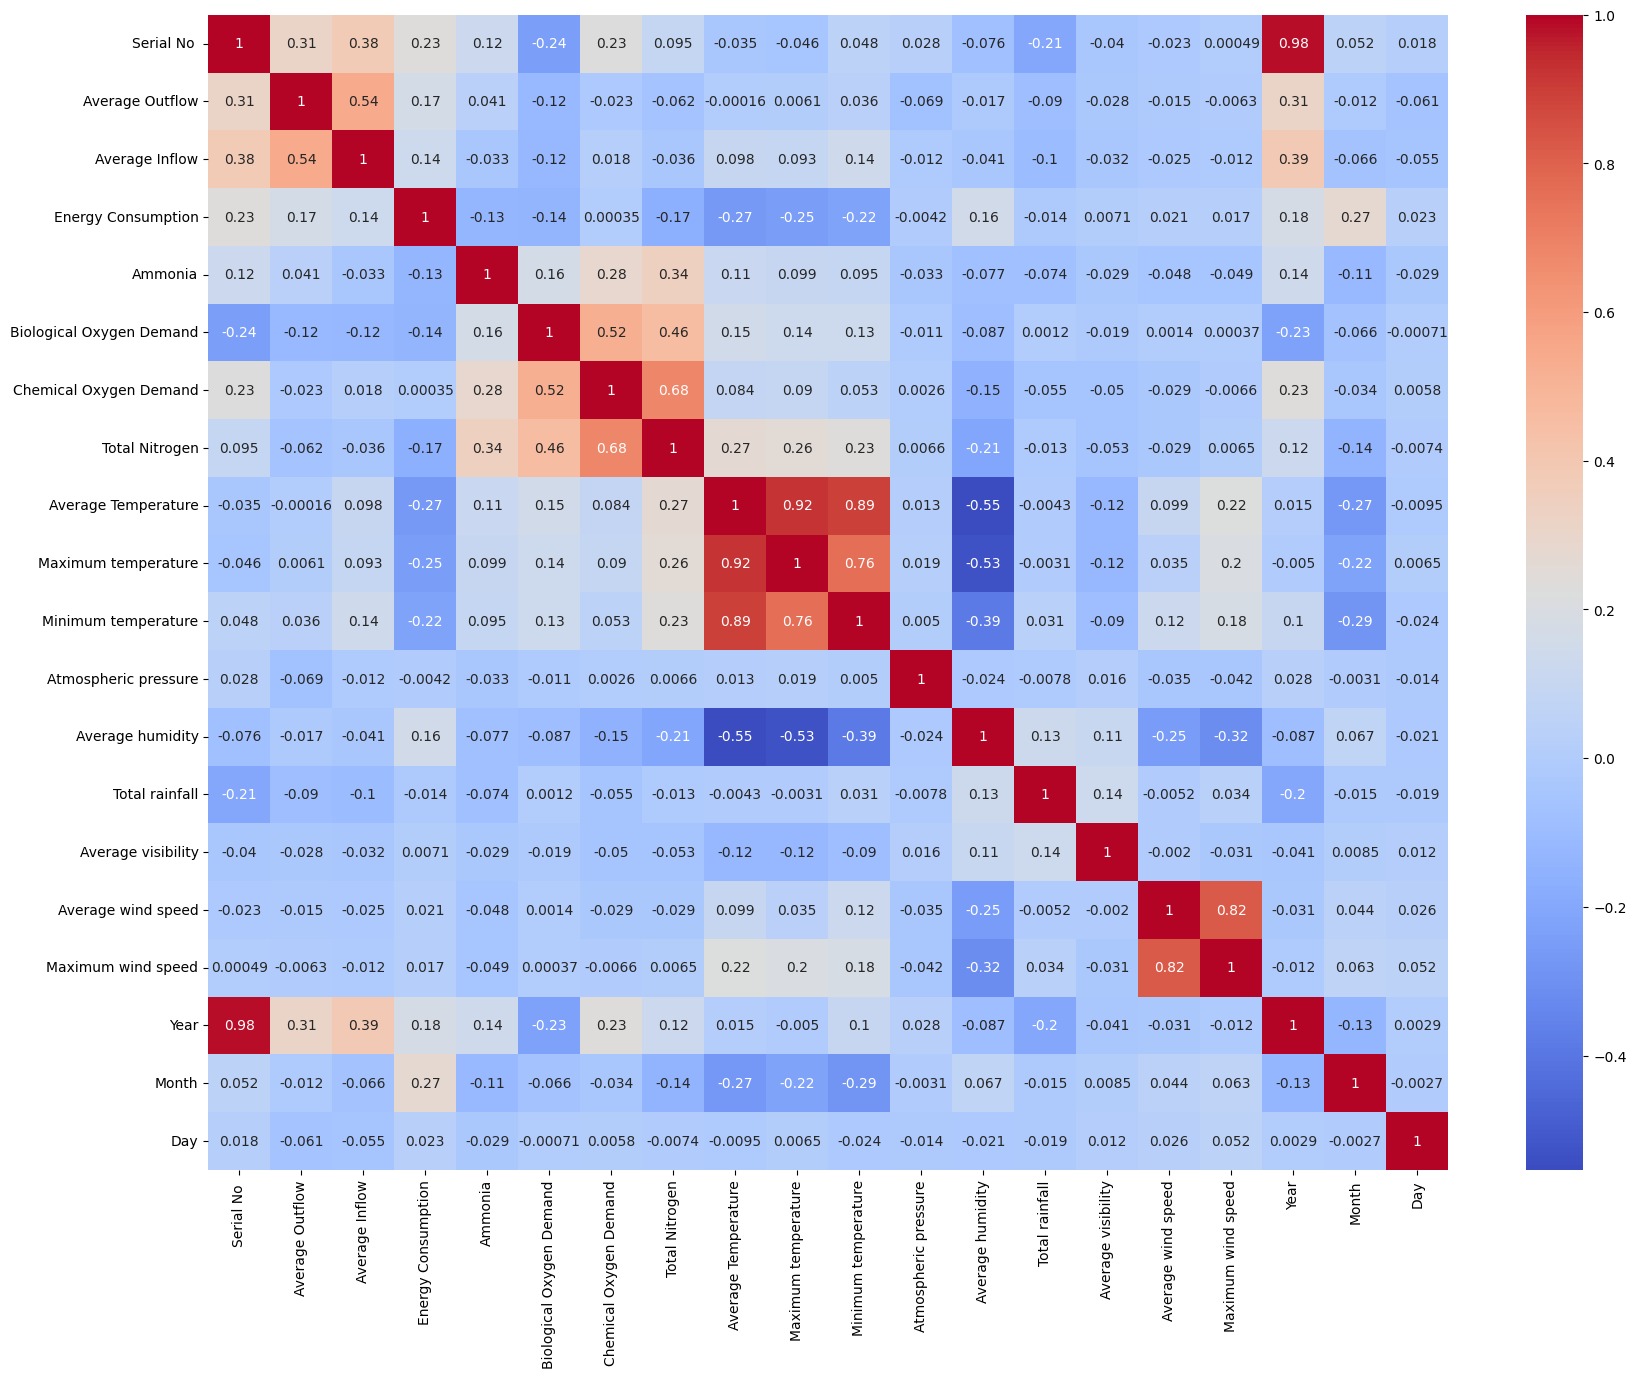

In [188]:
cor = data.corr()
plt.figure(figsize=(20, 15))
sns.heatmap(cor,annot=True,cmap='coolwarm')

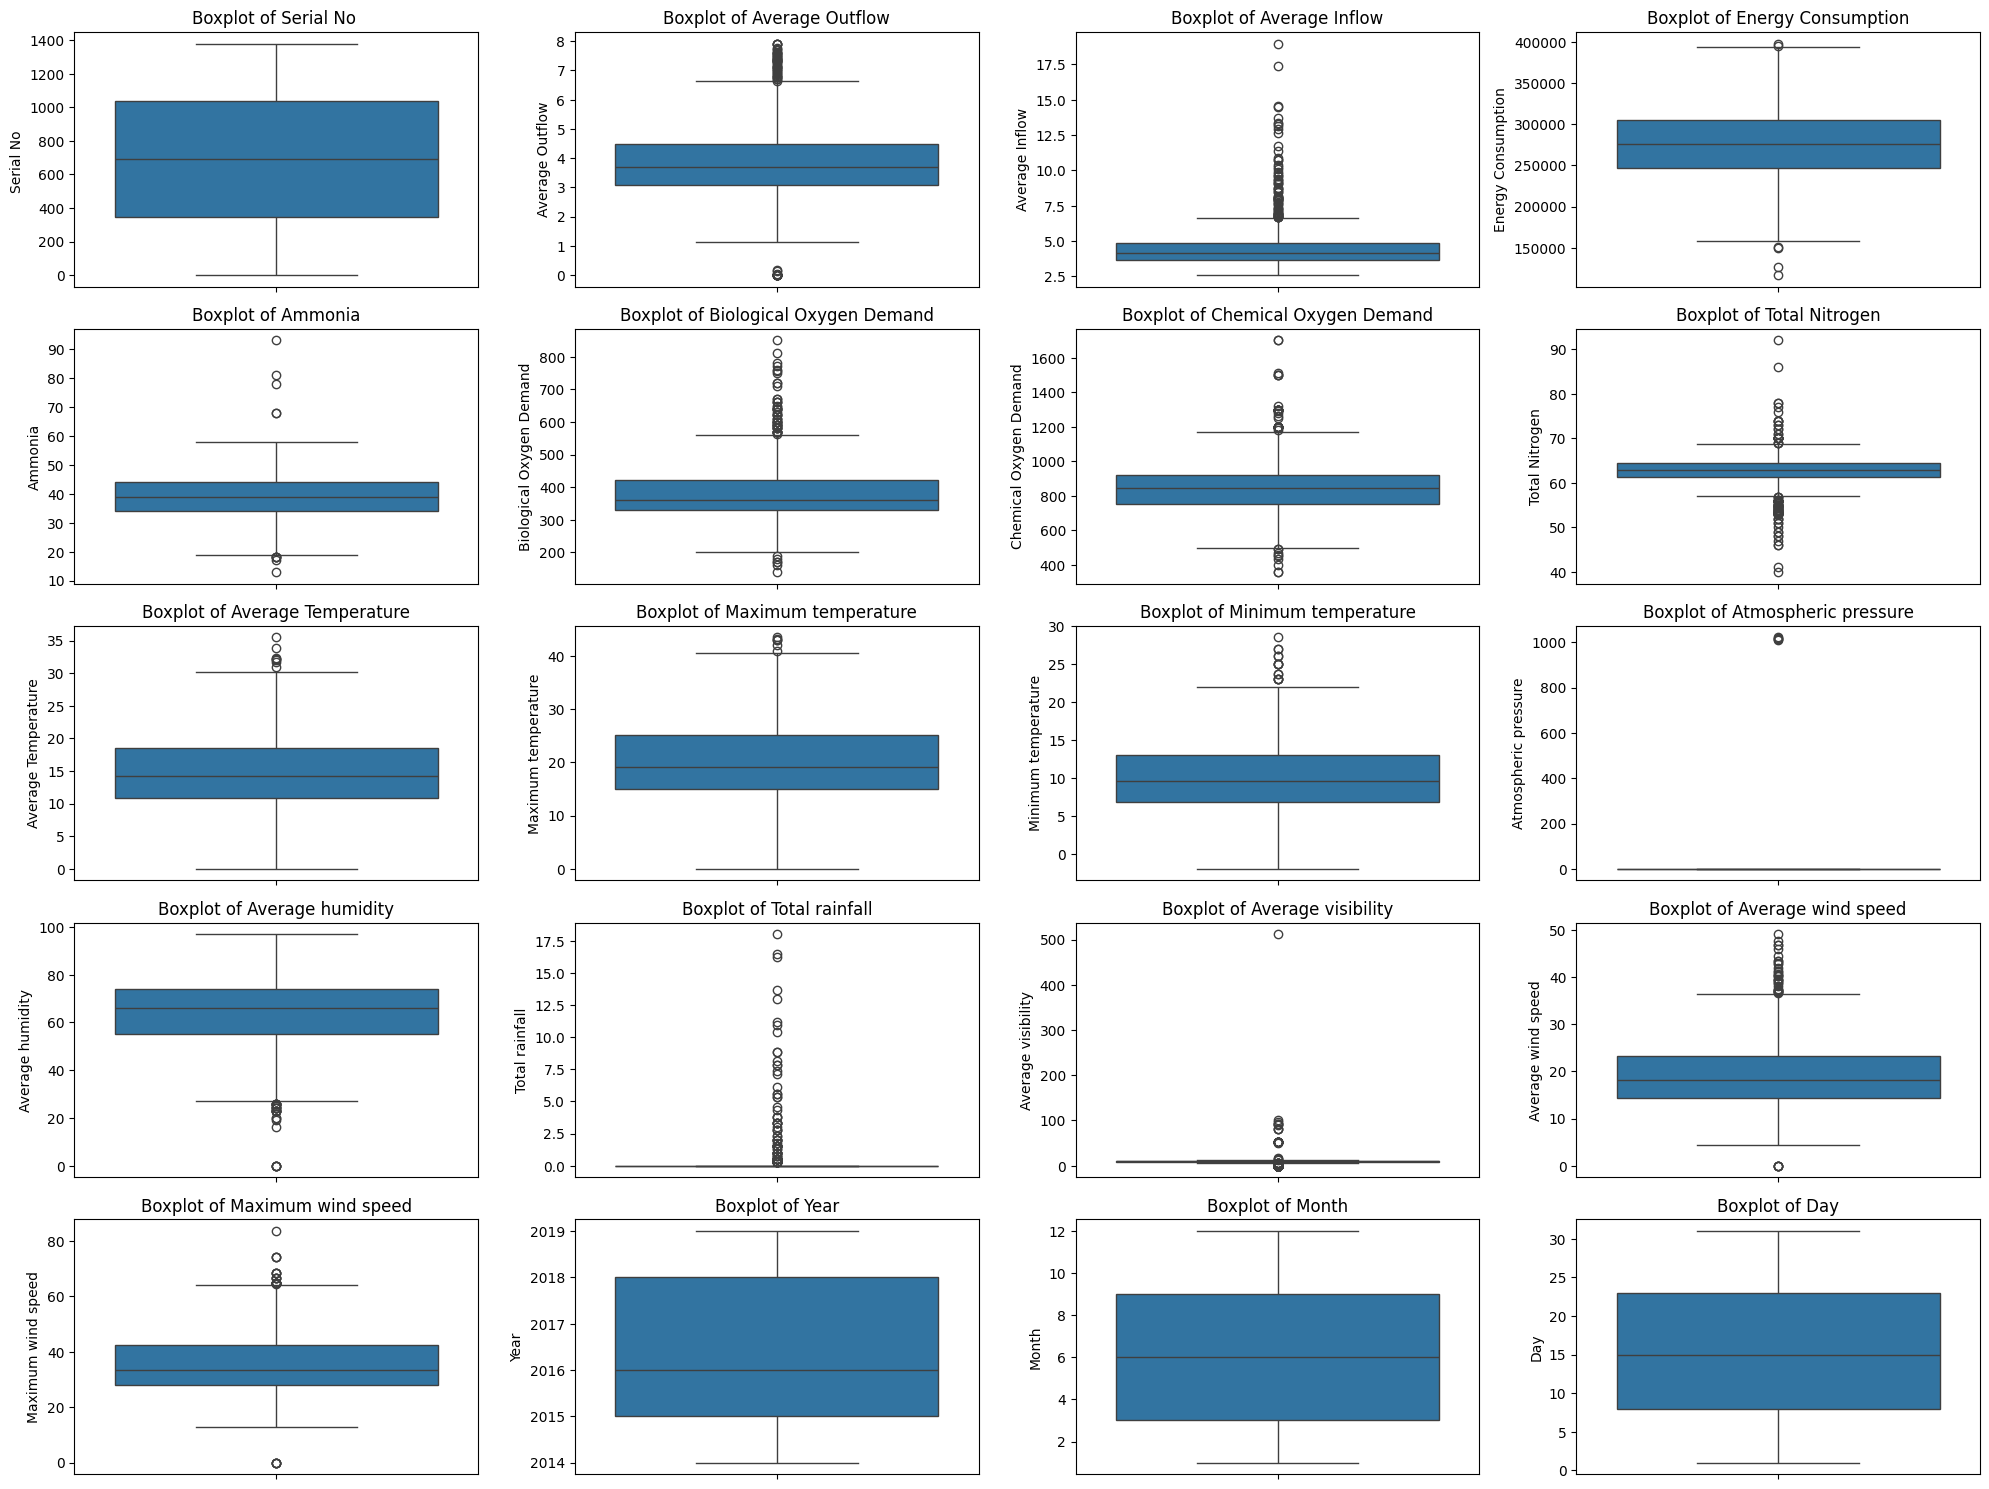

In [189]:
features = df.columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(5,4,i)
    sns.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

In [206]:
df1=df.copy()
df1=df.drop(columns=['Serial No '])

# Defining Thresholds for optimal performance
# Creating a Target Column 'Performance' based on 4 Chemical Metrics
df1['Performance']=np.where((df1['Ammonia']<30) &  (df1['Biological Oxygen Demand']<430) & 
                       (df1['Chemical Oxygen Demand']<750) & (df1['Total Nitrogen']<70),1,0)

In [207]:
df1

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Performance
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0,1
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0,1
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0,0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0,0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0,1
1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0,0
1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0,0
1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0,0


In [208]:
df1.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day,Performance
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660,0.060058
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422,0.237680
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000,0.000000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000,0.000000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000,0.000000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000,1.000000


In [209]:
counts = df1['Performance'].value_counts()
counts

Performance
0    1299
1      83
Name: count, dtype: int64

### Models

In [210]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [211]:
x = df1.drop(columns=['Performance'])
y = df1['Performance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardizing the values as they may be benefitial for Logistic Regression
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [212]:
#Logistic Regression from scratch
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for _ in range(self.n_iterations):
            predictions = self.sigmoid(np.dot(X, self.theta))
            gradients = np.dot(X.T, predictions - y) / y.size
            self.theta -= self.learning_rate * gradients
    
    def predict(self, X):
        return self.sigmoid(np.dot(X, self.theta)) >= 0.5

lr_scratch = LogisticRegressionScratch(learning_rate=0.1, n_iterations=1000)
lr_scratch.fit(x_train_scaled, y_train)
y_pred_lr_scratch = lr_scratch.predict(x_test_scaled)



In [213]:
# Comparing y_pred and y_test to calculate Accuracy and F-1 Score
TP = sum((y_test == 1) & (y_pred_lr_scratch == 1))  # True Positives
TN = sum((y_test == 0) & (y_pred_lr_scratch == 0))  # True Negatives
FP = sum((y_test == 0) & (y_pred_lr_scratch == 1))  # False Positives
FN = sum((y_test == 1) & (y_pred_lr_scratch == 0))  # False Negatives

# Metrics
accuracy_lr_scratch = (TP + TN) / len(y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_lr_scratch = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print("Accuracy:", accuracy_lr_scratch)
print("F1 Score:", f1_lr_scratch)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_scratch))

Accuracy: 0.6245487364620939
F1 Score: 0.27777777777777773
Confusion Matrix:
 [[153 104]
 [  0  20]]


In [201]:
# Logistic Regression Using SkLearn

log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

# Make predictions
y_pred_lr_sklearn = log_reg.predict(x_test_scaled)

# Model Evaluation
accuracy_lr_sklearn = accuracy_score(y_test, y_pred_lr_sklearn)
print(f"Accuracy of Logistic Regression using SkLearn: {accuracy_lr_sklearn:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr_sklearn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr_sklearn))

Accuracy of Logistic Regression using SkLearn: 0.9675

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       257
           1       0.87      0.65      0.74        20

    accuracy                           0.97       277
   macro avg       0.92      0.82      0.86       277
weighted avg       0.97      0.97      0.97       277

Confusion Matrix:
 [[255   2]
 [  7  13]]


In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [202]:
#Using KNN Algorithm
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_knn = knn_classifier.predict(x_test_scaled)

# Model evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier Accuracy on Dataset:", accuracy_knn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Classifier Accuracy on Dataset: 0.9494584837545126

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       257
           1       0.80      0.40      0.53        20

    accuracy                           0.95       277
   macro avg       0.88      0.70      0.75       277
weighted avg       0.94      0.95      0.94       277

Confusion Matrix:
 [[255   2]
 [ 12   8]]


In [181]:
from sklearn.svm import SVC

In [203]:
#Using Support Vector Machine Algorithm
svc_classifier = SVC(kernel='rbf')
svc_classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred_svm = svc_classifier.predict(x_test_scaled)

# Model Evaluation
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Classifier Accuracy:", accuracy_svm)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

Support Vector Classifier Accuracy: 0.9566787003610109

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       257
           1       0.90      0.45      0.60        20

    accuracy                           0.96       277
   macro avg       0.93      0.72      0.79       277
weighted avg       0.95      0.96      0.95       277

Confusion Matrix:
 [[256   1]
 [ 11   9]]


In [155]:
# using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

In [156]:
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [157]:
# Make prediction
y_pred_dt = dt.predict(x_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

print("\nDecision Tree Classification Report:\n")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0

Decision Tree Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00        20

    accuracy                           1.00       277
   macro avg       1.00      1.00      1.00       277
weighted avg       1.00      1.00      1.00       277

Confusion Matrix:
 [[257   0]
 [  0  20]]


In [158]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [159]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [184]:
# Make Prediction
y_pred_rf = rf_classifier.predict(x_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

print("\nRandom Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9963898916967509

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       0.95      1.00      0.98        20

    accuracy                           1.00       277
   macro avg       0.98      1.00      0.99       277
weighted avg       1.00      1.00      1.00       277

Confusion Matrix:
 [[256   1]
 [  0  20]]


#### Hyperparameter Tuning

In [37]:
# We will use GridSearchCV for Hyperparametric Tuning
from sklearn.model_selection import GridSearchCV

In [38]:
lr_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['liblinear', 'lbfgs', 'saga'],
            'max_iter': [100, 500, 1000]
        }

In [161]:
# For Logestic Regression
lr_gr = GridSearchCV(LogisticRegression(), lr_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
lr_gr.fit(x_train_scaled,y_train)
print("Best Parameters are:", lr_gr.best_params_)
print("Best Cross-validation Score:", lr_gr.best_score_)

Best Parameters are: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-validation Score: 0.9737556561085972


In [40]:
knn_grid =  {
            'n_neighbors': [3, 5, 7, 9, 11, 15],
            'weights': ['uniform', 'distance'],
            'metric': ['minkowski', 'euclidean', 'manhattan'],
            'p': [1, 2]
        }

In [162]:
# For KNN 
knn_gr = GridSearchCV(KNeighborsClassifier(), knn_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
knn_gr.fit(x_train_scaled,y_train)
print("Best Parameters are:", knn_gr.best_params_)
print("Best Cross-validation Score:", knn_gr.best_score_)

Best Parameters are: {'metric': 'minkowski', 'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Cross-validation Score: 0.9656108597285067


In [44]:
svm_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
            'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5],
            'degree': [2, 3, 4, 5],
            'class_weight': [None, 'balanced']
        }

In [163]:
# For SVM
svm_gr = GridSearchCV(SVC(), svm_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')
svm_gr.fit(x_train_scaled,y_train)
print("Best Parameters are:", svm_gr.best_params_)
print("Best Cross-validation Score:", svm_gr.best_score_)

Best Parameters are: {'C': 10, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-validation Score: 0.9710407239819003


##### The best-fit parameters when used will yield higher accuracy

##### For Random Forest and Decission Trees the Accuracy is very good hence Hyperparametric tuning might not be needed